In [21]:
import os
import os.path as p
service_prefix = ''
os.environ['LOCALTILESERVER_CLIENT_PREFIX'] = f"{service_prefix}/proxy/{{port}}"
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Using base class

In [7]:
new_output_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output/reconst_20200919_spatial.npy'
prev_output_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/prev_bt_output/output_full_real/reconst_20200919_spatial.npy'

new_output = np.load(new_output_path)
prev_output = np.load(prev_output_path)


In [9]:
diff = new_output - prev_output
print(diff.max())

0.0

Conclusion: at least for this particular file, the new code (seperating Interpolator via parent and child class) produces the same BT output.

In [17]:
new_output_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output_referenced/st/st_20170303.tif'
prev_output_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/prev_bt_output/output_referenced/st/st_20170303.tif'
new_output = cv2.imread(new_output_path, -1)
prev_output = cv2.imread(prev_output_path, -1)
diff = new_output - prev_output
print(diff.max())

0.0


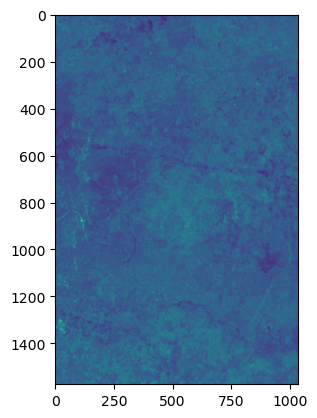

In [18]:
plt.imshow(new_output)
plt.show()

GeoTIFF files also match

## Is Eq 7 wrong?

Let's pick a cloud free date

In [21]:
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from interpolators.bt_interpolator import BT_Interpolator
from interpolators.lst_interpolator import LST_Interpolator

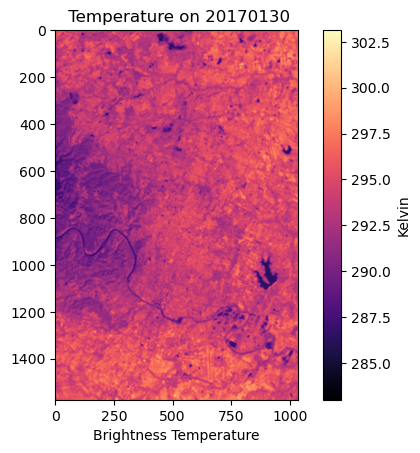

0

In [73]:
date_ = '20170130'
interp = LST_Interpolator(root='../data/Austin', target_date=date_)
bt = interp.get_frame(frame_date=date_, mode='bt')
interp.display(bt, xlabel_text='Brightness Temperature')

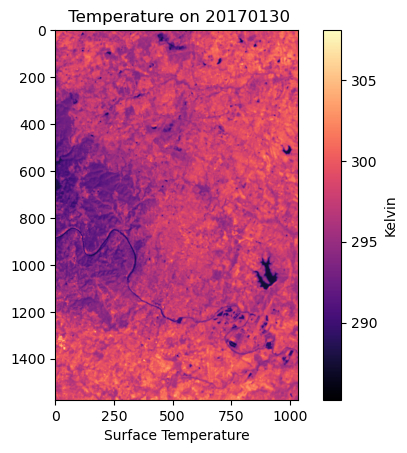

0

In [72]:
interp = LST_Interpolator(root='../data/Austin', target_date=date_)
lst = interp.get_frame(frame_date=date_, mode='lst')
interp.display(lst, xlabel_text='Surface Temperature')

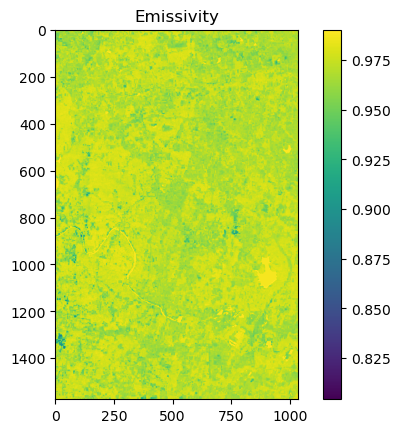

In [74]:
emis = cv2.imread(f'../data/Austin/emis/LC08_ST_EMIS_{date_}.tif', -1)
emis = emis * 0.0001
plt.imshow(emis)
plt.title('Emissivity')
plt.colorbar()
plt.show()

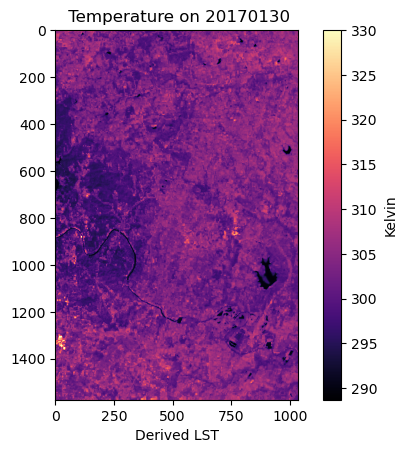

0

In [75]:
derived_lst = bt / emis
interp.display(derived_lst, xlabel_text='Derived LST')

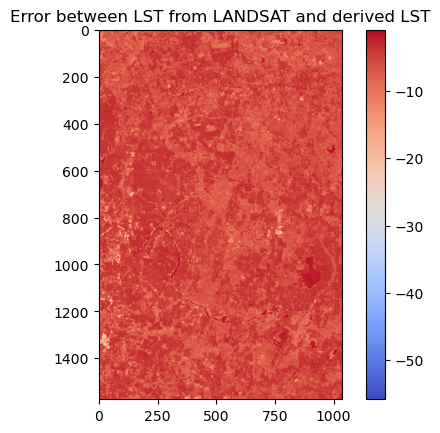

In [80]:
error = lst - derived_lst
plt.imshow(error, cmap='coolwarm')
plt.colorbar()
plt.title('Error between LST from LANDSAT and derived LST')
plt.show()

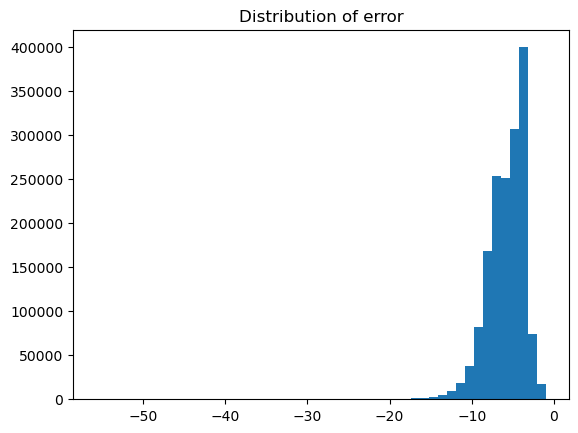

In [84]:
plt.hist(error.flatten(), bins=50)
plt.title('Distribution of error')
plt.show()

## Projecting LST GeoTIFF

In [2]:
import leafmap
import seaborn as sns

In [3]:
# threashold = 320
vis = {
  'min': 270,
  'max': 330,
  'palette' : sns.color_palette('inferno', 20).as_hex(),
}


m = leafmap.Map()
img_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/lst/LC08_ST_B10_20170303.tif'
img_path2 = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output_referenced/lst/20170303.tif'
img_path3 = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/prev_bt_output/output_referenced/st/st_20170303.tif'
# img = cv2.imread(img_path, -1)
m.add_raster(img_path, layer_name='before',palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(img_path2, layer_name='after', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(img_path3, layer_name='from_bt', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m

ValueError: The source path does not exist.

Looks good!

## f=200 vs. f=75

Previously, we have been using filter size f=75 for both spatial and temporal channel. Now let's use f=200 for both spatial and temporal.

In [9]:
date_ = '20190629'
# threashold = 320
vis = {
  'min': 270,
  'max': 330,
  'palette' : sns.color_palette('inferno', 20).as_hex(),
}


m = leafmap.Map()
original = f'/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/lst/LC08_ST_B10_{date_}.tif'
f_75 = f'/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output_referenced_f75/lst/{date_}.tif'
f_200 = f'/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output_referenced_f200/lst/{date_}.tif'
# img = cv2.imread(img_path, -1)
m.add_raster(original, layer_name='original',palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(f_75, layer_name='f_75', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(f_200, layer_name='f_200', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Result visually make sense. Not sure which one is better quantatitively.

## LST output vs. BT output

In [12]:
# threashold = 320
vis = {
  'min': 270,
  'max': 330,
  'palette' : sns.color_palette('inferno', 20).as_hex(),
}


m = leafmap.Map()
img_path = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/lst/LC08_ST_B10_20170303.tif'
img_path2 = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/output_referenced_f75/lst/20170303.tif'
img_path3 = '/home/yuhaoliu/Code/UrbanSurfTemp/data/Austin/prev_bt_output/output_referenced/st/st_20170303.tif'
# img = cv2.imread(img_path, -1)
m.add_raster(img_path, layer_name='before',palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(img_path2, layer_name='after', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m.add_raster(img_path3, layer_name='from_bt', palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Visually quickly examine new output

In [53]:
import geemap
# threashold = 320
vis = {
  'min': 270,
  'max': 330,
  'palette' : sns.color_palette('inferno', 20).as_hex(),
}

dir_ = "/home/yuhaoliu/Data/ISLAND/cities/"
cities = os.listdir(dir_)
print(cities)
city = cities[19]
print(city)
Map = geemap.Map()
f = os.listdir(os.path.join(dir_, city, 'output_referenced', 'lst'))[0]
print(f)
Map.add_raster(os.path.join(dir_, city, 'output_referenced', 'lst', f), layer_name='output',palette=vis['palette'], vmax=vis['max'], vmin=vis['min'])
Map

['San Francisco', 'Seattle', 'San Diego', 'Charlotte', 'San Antonio', 'New York', 'Fort Worth', 'Chicago', 'Austin', 'Houston', 'Denver', 'Oklahoma City', 'Dallas', 'Indianapolis', 'San Jose', 'Jacksonville', 'Columbus', 'Phoenix', 'Los Angeles', 'Philadelphia']
Philadelphia
lst_20230901.tif


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Looks ok.